In [1]:
# Train small sample using CL

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
import os

2023-05-11 17:49:02.630932: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-11 17:49:02.632656: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 17:49:02.674825: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 17:49:02.675627: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 17:49:03.240928: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
wireplane = "U"
np.random.seed(77)
path = './small_sample/'

In [4]:
'''
grouped_samples = np.array(
    (
    [[adc_0_x_train, adc_0_y_train], [adc_0_x_valid, adc_0_y_valid], [adc_0_x_test, adc_0_y_test]],
    [[adc_1_x_train, adc_1_y_train], [adc_1_x_valid, adc_1_y_valid], [adc_1_x_test, adc_1_y_test]],
    [[adc_2_x_train, adc_2_y_train], [adc_2_x_valid, adc_2_y_valid], [adc_2_x_test, adc_2_y_test]],
    [[adc_3_x_train, adc_3_y_train], [adc_3_x_valid, adc_3_y_valid], [adc_3_x_test, adc_3_y_test]],
    [[adc_4_x_train, adc_4_y_train], [adc_4_x_valid, adc_4_y_valid], [adc_4_x_test, adc_4_y_test]],
    [[adc_5_x_train, adc_5_y_train], [adc_5_x_valid, adc_5_y_valid], [adc_5_x_test, adc_5_y_test]],
    [[adc_6_x_train, adc_6_y_train], [adc_6_x_valid, adc_6_y_valid], [adc_6_x_test, adc_6_y_test]]), dtype='object'
)

print(grouped_samples.shape)
pp.group_num_labels
'''

"\ngrouped_samples = np.array(\n    (\n    [[adc_0_x_train, adc_0_y_train], [adc_0_x_valid, adc_0_y_valid], [adc_0_x_test, adc_0_y_test]],\n    [[adc_1_x_train, adc_1_y_train], [adc_1_x_valid, adc_1_y_valid], [adc_1_x_test, adc_1_y_test]],\n    [[adc_2_x_train, adc_2_y_train], [adc_2_x_valid, adc_2_y_valid], [adc_2_x_test, adc_2_y_test]],\n    [[adc_3_x_train, adc_3_y_train], [adc_3_x_valid, adc_3_y_valid], [adc_3_x_test, adc_3_y_test]],\n    [[adc_4_x_train, adc_4_y_train], [adc_4_x_valid, adc_4_y_valid], [adc_4_x_test, adc_4_y_test]],\n    [[adc_5_x_train, adc_5_y_train], [adc_5_x_valid, adc_5_y_valid], [adc_5_x_test, adc_5_y_test]],\n    [[adc_6_x_train, adc_6_y_train], [adc_6_x_valid, adc_6_y_valid], [adc_6_x_test, adc_6_y_test]]), dtype='object'\n)\n\nprint(grouped_samples.shape)\npp.group_num_labels\n"

In [5]:

dataset = np.load('./small_sample/processed_U.npy', allow_pickle=True)
mean = np.load('./small_sample/mean_U.npy')
std = np.load('./small_sample/std_U.npy')

In [6]:
train_idx = 0
valid_idx = 1
test_idx = 2
x_idx = 0
y_idx = 1


In [7]:
adc_group = 0
adc_0_x_train_scaled = (dataset[adc_group][train_idx][x_idx]-mean)/std
adc_0_y_train_scaled = (dataset[adc_group][train_idx][y_idx]-mean)/std

adc_0_x_valid_scaled = (dataset[adc_group][valid_idx][x_idx]-mean)/std
adc_0_y_valid_scaled = (dataset[adc_group][valid_idx][y_idx]-mean)/std

adc_0_x_test_scaled = (dataset[adc_group][test_idx][x_idx]-mean)/std
adc_0_y_test_scaled = (dataset[adc_group][test_idx][y_idx]-mean)/std


adc_group = 1
adc_1_x_train_scaled = (dataset[adc_group][train_idx][x_idx]-mean)/std
adc_1_y_train_scaled = (dataset[adc_group][train_idx][y_idx]-mean)/std

adc_1_x_valid_scaled = (dataset[adc_group][valid_idx][x_idx]-mean)/std
adc_1_y_valid_scaled = (dataset[adc_group][valid_idx][y_idx]-mean)/std

adc_1_x_test_scaled = (dataset[adc_group][test_idx][x_idx]-mean)/std
adc_1_y_test_scaled = (dataset[adc_group][test_idx][y_idx]-mean)/std

adc_group = 2
adc_2_x_train_scaled = (dataset[adc_group][train_idx][x_idx]-mean)/std
adc_2_y_train_scaled = (dataset[adc_group][train_idx][y_idx]-mean)/std

adc_2_x_valid_scaled = (dataset[adc_group][valid_idx][x_idx]-mean)/std
adc_2_y_valid_scaled = (dataset[adc_group][valid_idx][y_idx]-mean)/std

adc_2_x_test_scaled = (dataset[adc_group][test_idx][x_idx]-mean)/std
adc_2_y_test_scaled = (dataset[adc_group][test_idx][y_idx]-mean)/std

adc_group = 3
adc_3_x_train_scaled = (dataset[adc_group][train_idx][x_idx]-mean)/std
adc_3_y_train_scaled = (dataset[adc_group][train_idx][y_idx]-mean)/std

adc_3_x_valid_scaled = (dataset[adc_group][valid_idx][x_idx]-mean)/std
adc_3_y_valid_scaled = (dataset[adc_group][valid_idx][y_idx]-mean)/std

adc_3_x_test_scaled = (dataset[adc_group][test_idx][x_idx]-mean)/std
adc_3_y_test_scaled = (dataset[adc_group][test_idx][y_idx]-mean)/std

adc_group = 4
adc_4_x_train_scaled = (dataset[adc_group][train_idx][x_idx]-mean)/std
adc_4_y_train_scaled = (dataset[adc_group][train_idx][y_idx]-mean)/std

adc_4_x_valid_scaled = (dataset[adc_group][valid_idx][x_idx]-mean)/std
adc_4_y_valid_scaled = (dataset[adc_group][valid_idx][y_idx]-mean)/std

adc_4_x_test_scaled = (dataset[adc_group][test_idx][x_idx]-mean)/std
adc_4_y_test_scaled = (dataset[adc_group][test_idx][y_idx]-mean)/std

adc_group = 5
adc_5_x_train_scaled = (dataset[adc_group][train_idx][x_idx]-mean)/std
adc_5_y_train_scaled = (dataset[adc_group][train_idx][y_idx]-mean)/std

adc_5_x_valid_scaled = (dataset[adc_group][valid_idx][x_idx]-mean)/std
adc_5_y_valid_scaled = (dataset[adc_group][valid_idx][y_idx]-mean)/std

adc_5_x_test_scaled = (dataset[adc_group][test_idx][x_idx]-mean)/std
adc_5_y_test_scaled = (dataset[adc_group][test_idx][y_idx]-mean)/std

adc_group = 6
adc_6_x_train_scaled = (dataset[adc_group][train_idx][x_idx]-mean)/std
adc_6_y_train_scaled = (dataset[adc_group][train_idx][y_idx]-mean)/std

adc_6_x_valid_scaled = (dataset[adc_group][valid_idx][x_idx]-mean)/std
adc_6_y_valid_scaled = (dataset[adc_group][valid_idx][y_idx]-mean)/std

adc_6_x_test_scaled = (dataset[adc_group][test_idx][x_idx]-mean)/std
adc_6_y_test_scaled = (dataset[adc_group][test_idx][y_idx]-mean)/std


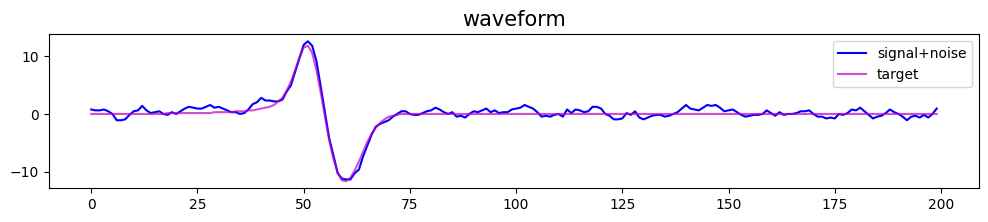

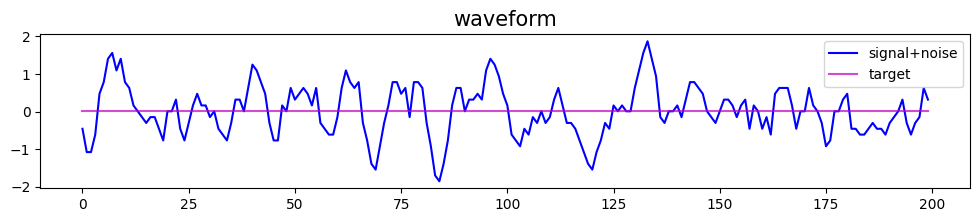

In [8]:
for idx in range(98,100):
    fig, (ax1) = plt.subplots(figsize=(12, 2), facecolor='white')
    ax1.plot(adc_6_x_train_scaled[idx],color='blue', label='signal+noise')
    ax1.plot(adc_6_y_train_scaled[idx],color='m',alpha=0.7, label='target')
    ax1.set_title("waveform", fontsize=15)
    ax1.legend()

    plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv1DTranspose

In [10]:
time_periods = 200
autoencoder = Sequential()
# encoder
autoencoder.add(Conv1D(filters=16, kernel_size=3, padding="same", strides=2, activation = "relu", input_shape=(time_periods,1)))
autoencoder.add(Conv1D(filters=32, kernel_size=5, padding="same", strides=4, activation = "relu"))
autoencoder.add(Conv1D(filters=64, kernel_size=9, padding="same", strides=5, activation = "relu"))

# decoder
autoencoder.add(Conv1DTranspose(filters=64, kernel_size=9, padding="same", strides=5, activation = "relu"))
autoencoder.add(Conv1DTranspose(filters=32, kernel_size=5, padding="same", strides=4, activation = "relu"))
autoencoder.add(Conv1DTranspose(filters=16, kernel_size=3, padding="same", strides=2, activation = "relu"))

autoencoder.add(Conv1DTranspose(filters=1, kernel_size=3, padding="same"))

autoencoder.compile(loss='mse', optimizer='adam')


In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 100, 16)           64        
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 32)            2592      
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 64)             18496     
                                                                 
 conv1d_transpose (Conv1DTra  (None, 25, 64)           36928     
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 100, 32)          10272     
 ranspose)                                                       
                                                                 
 conv1d_transpose_2 (Conv1DT  (None, 200, 16)          1

In [12]:
train_val_0 = [adc_0_x_train_scaled, adc_0_y_train_scaled,
               adc_0_x_valid_scaled, adc_0_y_valid_scaled]

train_val_1 = [adc_1_x_train_scaled, adc_1_y_train_scaled,
               adc_1_x_valid_scaled, adc_1_y_valid_scaled]

train_val_1 = [adc_1_x_train_scaled, adc_1_y_train_scaled,
               adc_1_x_valid_scaled, adc_1_y_valid_scaled]

train_val_2 = [adc_2_x_train_scaled, adc_2_y_train_scaled,
               adc_2_x_valid_scaled, adc_2_y_valid_scaled]

train_val_3 = [adc_3_x_train_scaled, adc_3_y_train_scaled,
               adc_3_x_valid_scaled, adc_3_y_valid_scaled]

train_val_4 = [adc_4_x_train_scaled, adc_4_y_train_scaled,
               adc_4_x_valid_scaled, adc_4_y_valid_scaled]

train_val_5 = [adc_5_x_train_scaled, adc_5_y_train_scaled,
               adc_5_x_valid_scaled, adc_5_y_valid_scaled]

train_val_6 = [adc_6_x_train_scaled, adc_6_y_train_scaled,
               adc_6_x_valid_scaled, adc_6_y_valid_scaled]

In [13]:
all_train_val = [train_val_6, train_val_5, train_val_4,
                 train_val_3, train_val_2, train_val_1,
                 train_val_0]

In [14]:
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [15]:
from tensorflow.keras.models import load_model

Epoch 1/1000
32/32 [==============================] - 1s 12ms/step - loss: 2.3645 - val_loss: 1.0197
Epoch 2/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.4985 - val_loss: 0.2507
Epoch 3/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.1881 - val_loss: 0.1499
Epoch 4/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.1243 - val_loss: 0.1131
Epoch 5/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0993 - val_loss: 0.0947
Epoch 6/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0844 - val_loss: 0.0897
Epoch 7/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0733 - val_loss: 0.0773
Epoch 8/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0695 - val_loss: 0.0776
Epoch 9/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0625 - val_loss: 0.0678
Epoch 10/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0614 - val_loss: 0.068

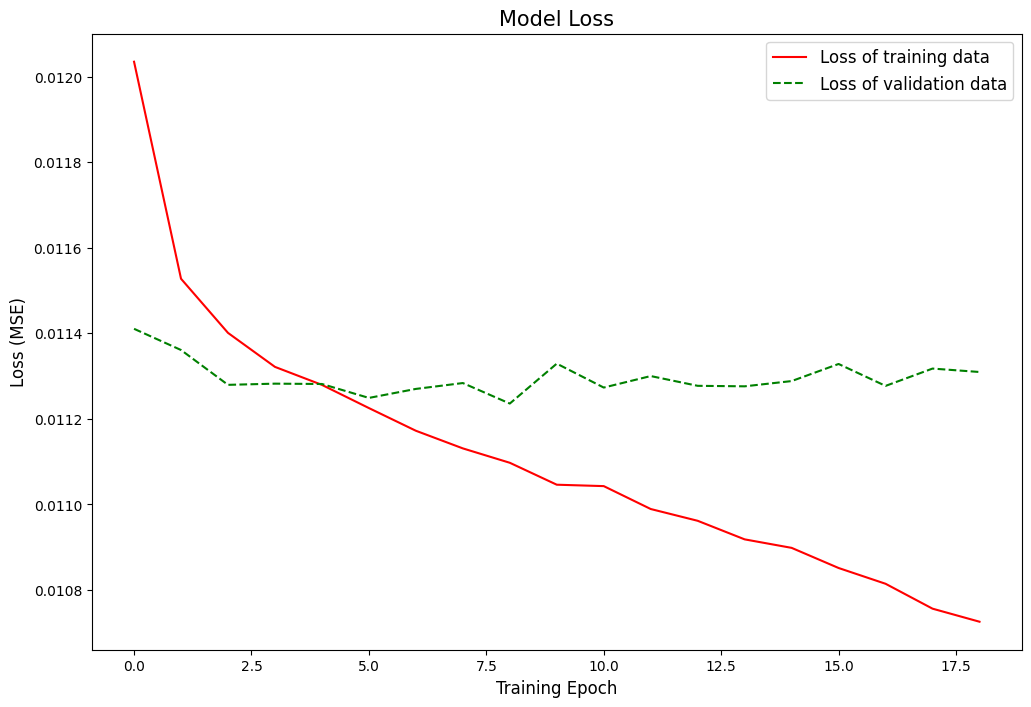

In [16]:
for i in range(7):
    batch_size_ = 100
    history = autoencoder.fit(all_train_val[i][0],                                                              
                    all_train_val[i][1],                                                            
                    batch_size=batch_size_,                                              
                    epochs=1000,                                                      
                    callbacks= [earlystop], #[NewCallback(alpha)], # callbacks=callbacks_list,
                    validation_data=(all_train_val[i][2], all_train_val[i][3]),                                                                      
                    verbose=1)
    
plt.figure(figsize=(12, 8))                                                     
plt.plot(history.history['loss'], "r", label="Loss of training data", antialiased=True)
plt.plot(history.history['val_loss'], "g--", label="Loss of validation data", antialiased=True)
plt.title('Model Loss',fontsize=15)                                            
plt.ylabel('Loss (MSE)', fontsize=12)                                                 
plt.xlabel('Training Epoch', fontsize=12)                                                                                                                       
plt.legend(fontsize=12)           
filename = './loss/stage_'+str(i) + '_loss.png'
plt.savefig(filename, facecolor='w', bbox_inches='tight')                                                         
plt.show()   

In [23]:
path = '../../processed_data/'

In [24]:
x_train = np.load(path+'x_train_' + wireplane + '.npy')
x_test = np.load(path+'x_test_' + wireplane + '.npy')
y_train = np.load(path+'y_train_AE_' + wireplane + '.npy')
y_test = np.load(path+'y_test_AE_' + wireplane + '.npy')

In [26]:
x_train_scaled = (x_train-mean)/std
x_test_scaled = (x_test-mean)/std


y_train_scaled = (y_train-mean)/std
y_test_scaled = (y_test-mean)/std


In [27]:
%%time
predictions = autoencoder.predict(x_test_scaled, batch_size=4096)
predictions = predictions.reshape(predictions.shape[0], predictions.shape[1])



25/25 [==============================] - 1s 56ms/step
CPU times: user 5.7 s, sys: 274 ms, total: 5.98 s
Wall time: 1.71 s


In [28]:
from scipy import stats
x_test_ = std*x_test_scaled+mean
y_test_ = y_test_scaled*std + mean


pred = predictions*std + mean

In [29]:
# takes in prediction of AE and for every wave assigns 0 or 1
# 0 --> predicted as noise
# 1 --> pricicted as containing some kind of signals
# note that this is crude and does not consider how close the predicted signal is from truth
def label_predictions(ae_pred_wave):
    label_ = 0
    if max(abs(ae_pred_wave)) > 3:
        label_ = 1
    return label_


def label_truths(wave):
    label_ = 1
    if max(abs(wave)) <= 3:
        label_ = 0
    return label_

In [30]:
pred_labels = [label_predictions(wave) for wave in pred]
truth_labels = [label_truths(t_wave) for t_wave in y_test_]

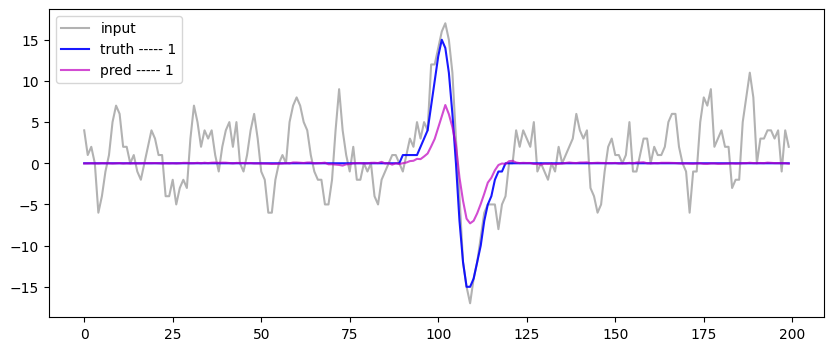

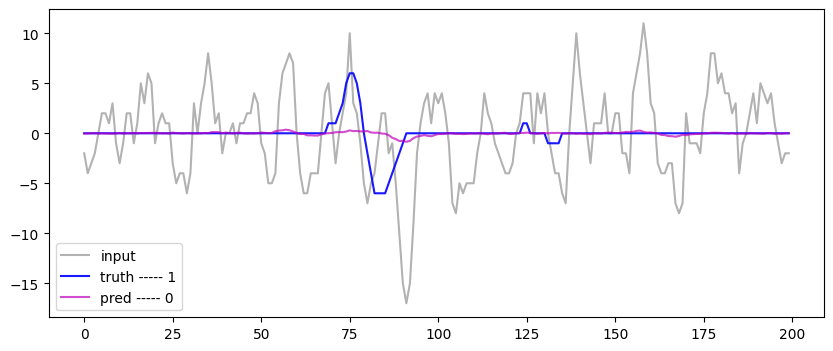

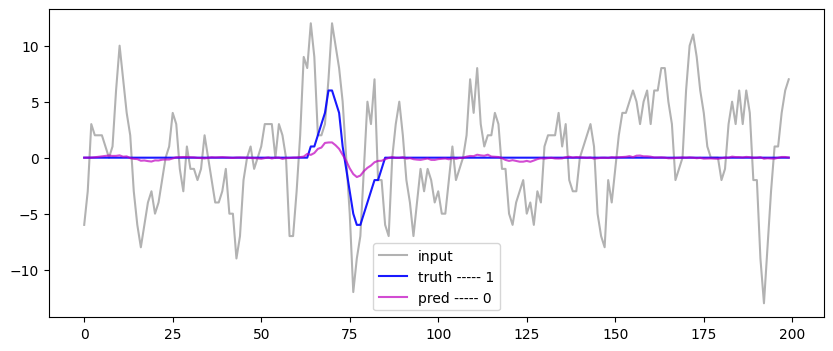

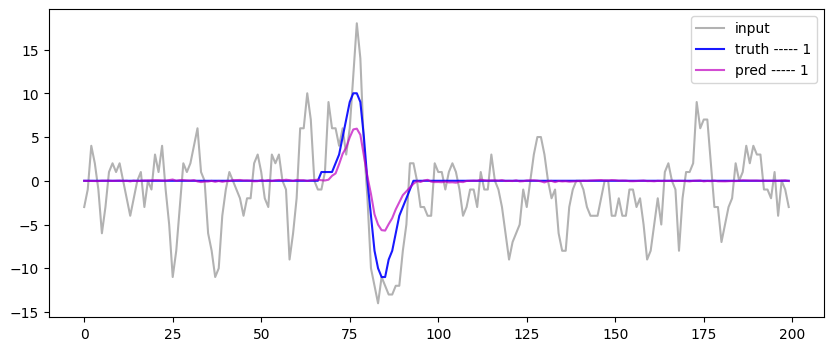

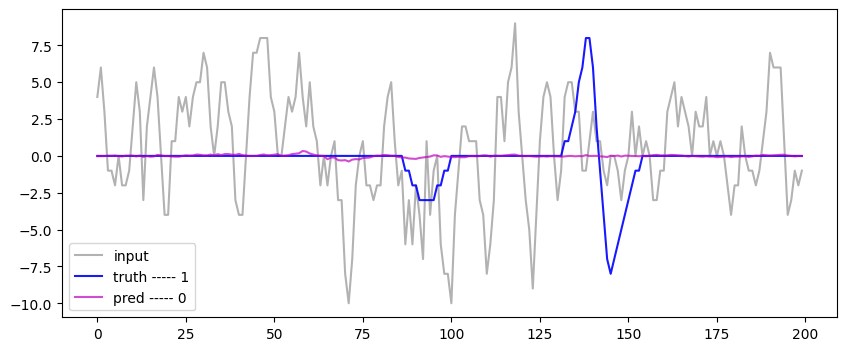

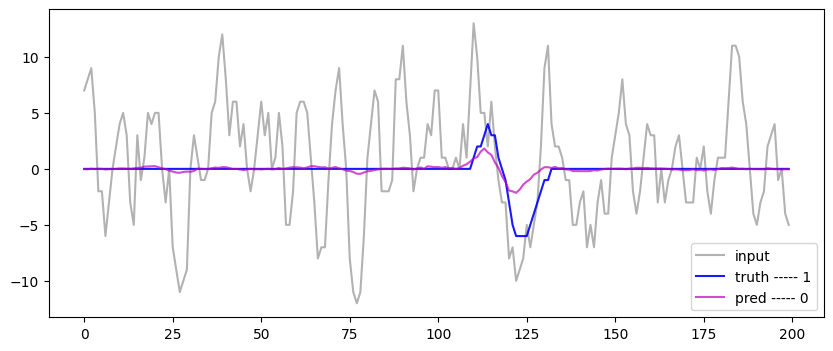

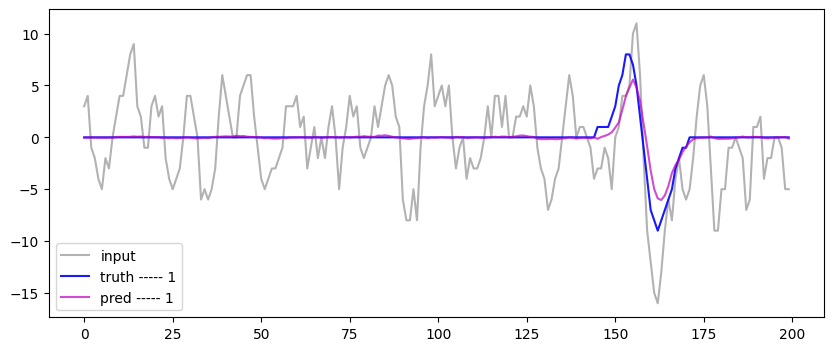

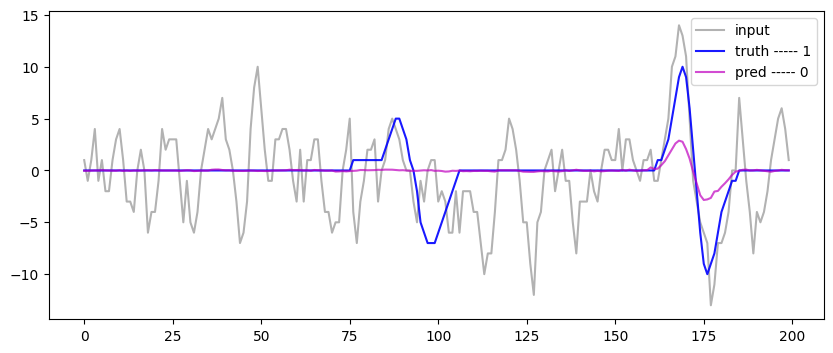

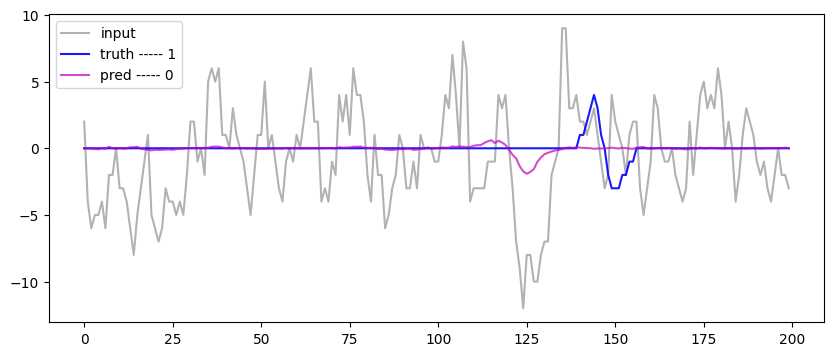

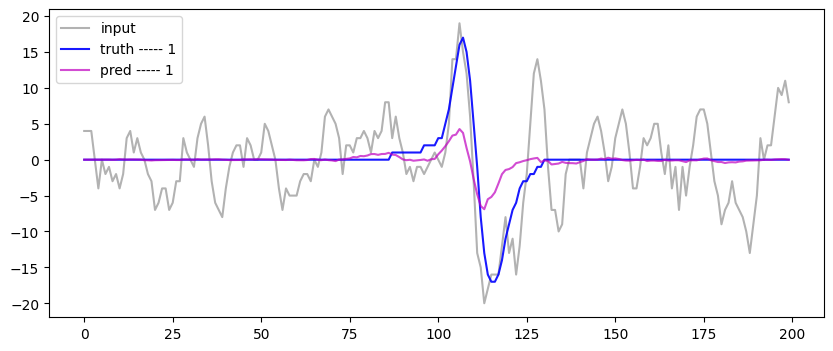

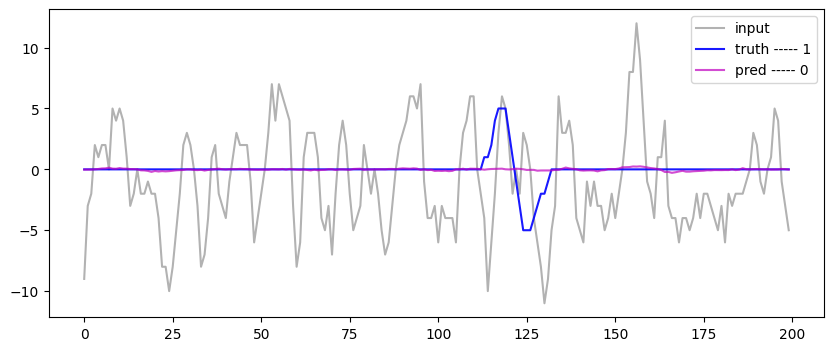

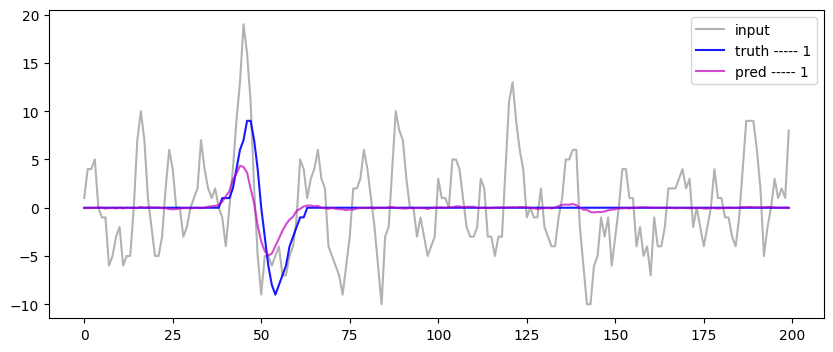

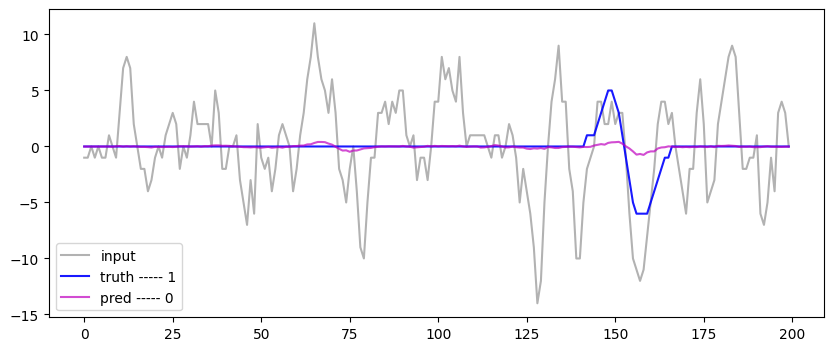

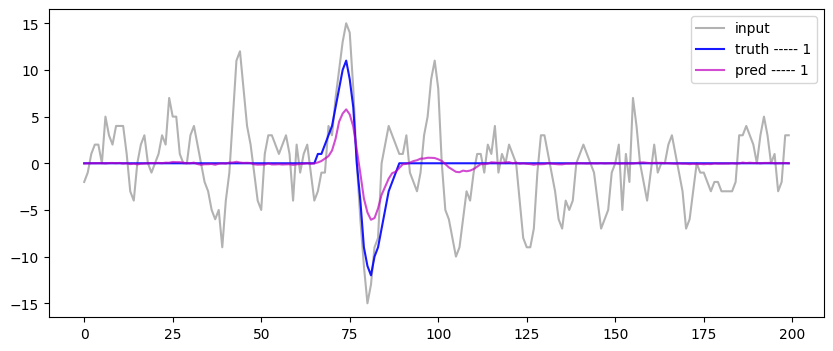

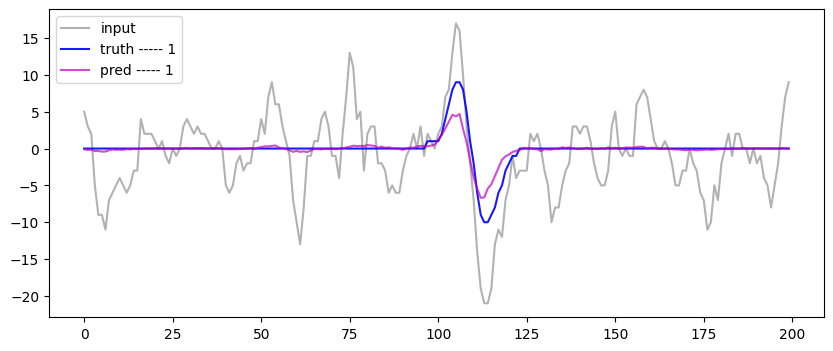

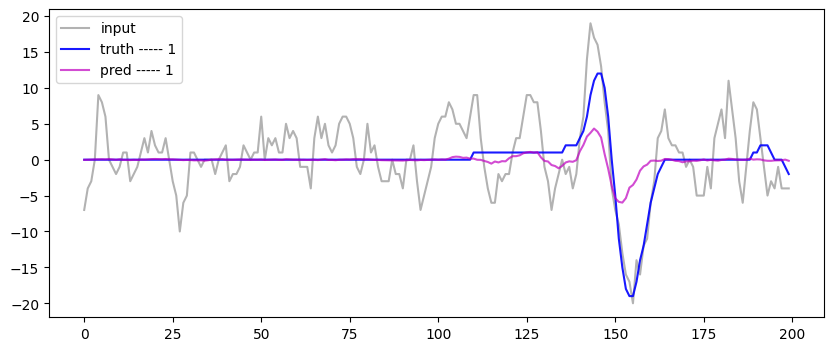

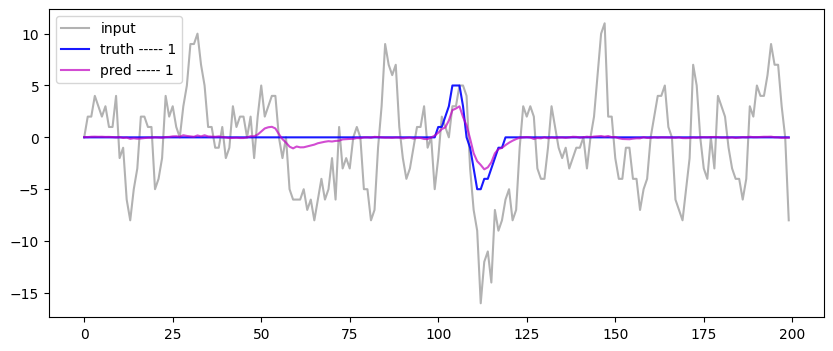

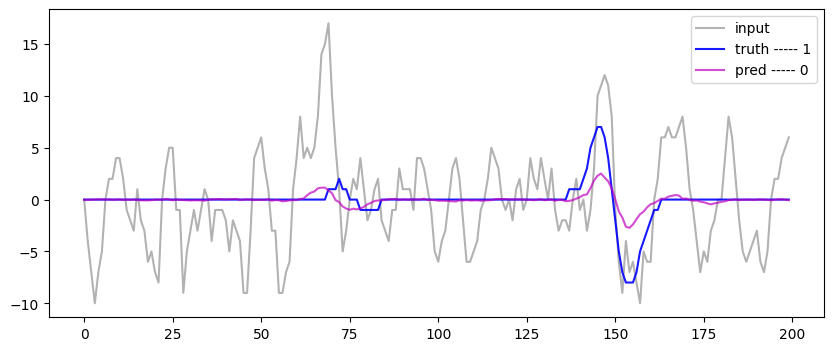

In [31]:
for i in range(100,200):
    if max(abs(y_test_[i])) < 20 and sum(abs(y_test_[i])) !=0:
        fig = plt.figure(figsize=(10,4))
        plt.plot(x_test_[i], color='black', alpha=0.3, label='input')
        plt.plot(y_test_[i], color='blue', alpha=0.9, label='truth ----- ' + str(truth_labels[i]))
        plt.plot(pred[i], color='m', alpha=0.7, label='pred ----- ' + str(pred_labels[i]))
        plt.legend()
        plt.show()


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(truth_labels, pred_labels, drop_intermediate=False)
roc_auc = auc(fpr, tpr)


In [ ]:
fig = plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='m', label='(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.title('ROC Curve', size=12)
plt.legend(loc="lower right")
plt.show()